## Домашнее задание 2: Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается.

* Старайтесь сделать код как можно более оптимальным и читаемым.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

**Задание 1 (1 балл)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [3]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [4]:
data[data.isna().any(axis=1)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


**Задача 2 (1 балл)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их. Поясните свой выбор (напишите текстом обоснование).

In [5]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
#Удаляем поле Unnamed: 0 (индекс 1-N) не несет никакой информации
data = data.drop(columns=data.columns[0])

In [7]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задание 3 (1 балл)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками. Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какие вещественные признаки коррелируют с целевой переменной больше всего?

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

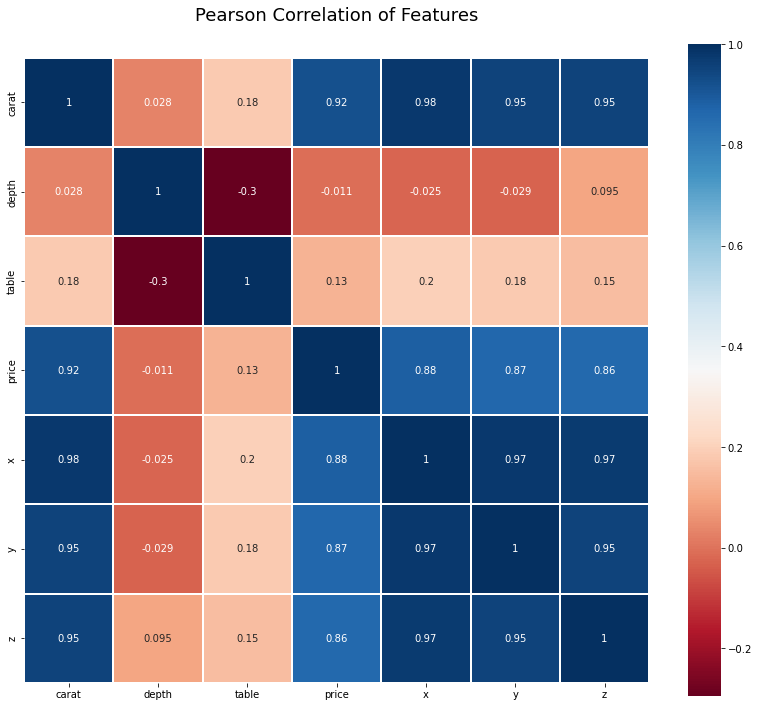

In [8]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(data.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:title={'center':'Spearman Correlation of Features'}>

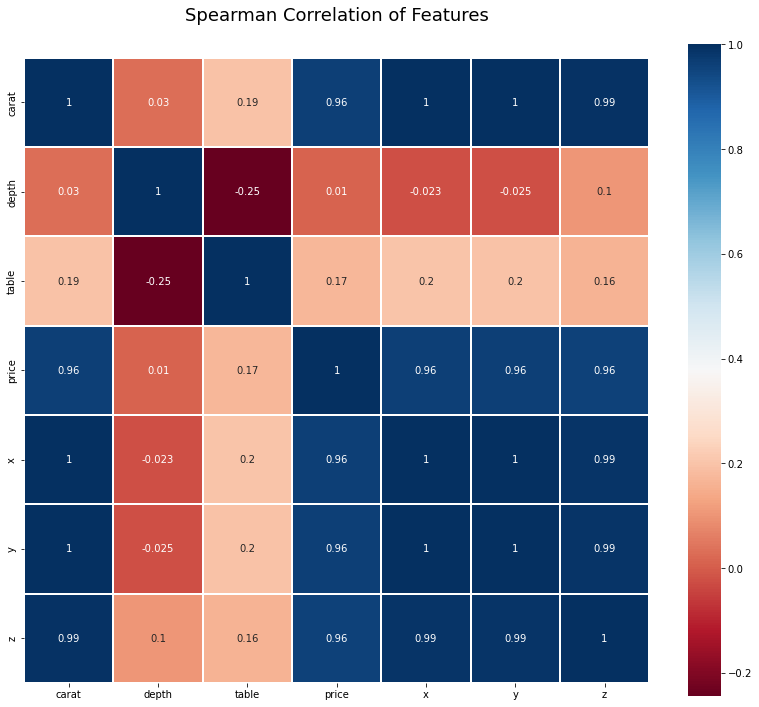

In [9]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Spearman Correlation of Features', y=1.05, size=18)
sns.heatmap(data.corr(method='spearman'), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [10]:
#Выведем значения корреляции в порядке убывания абсолютного значения 
data.corr(method='spearman').price.apply('abs').sort_values(ascending=False)

price    1.000000
x        0.963196
carat    0.962883
y        0.962719
z        0.957232
table    0.171784
depth    0.010020
Name: price, dtype: float64

##### Итого: carat,x,y,z - имеют наибольшую корреляцию с ценой (причем даже линейной зависимотью описывается 85%+ цены),а у carat 96% линейной зависимостью

**Задание 4 (1 балл)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра drop_first равным True.

In [11]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
data.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [13]:
data_with_dummies = pd.get_dummies(data, drop_first=True)

In [14]:
data_with_dummies.head(5)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задание 5 (1 балл)** 
Создайте матрицу X, содержащую все признаки, и не содержащую целевую переменную price. Также создайте вектор y, содержащий целевую переменную price.

In [15]:
X_ = data_with_dummies.drop(columns='price')

In [16]:
y_ = data_with_dummies[['price']]

In [17]:
X_.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [18]:
X_.head(3)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
y_.head(3)

,price
0,326
1,326
2,327


**Задание 5 (1 балл)** 
Перемешайте данные! 

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [20]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_, y_, test_size=0.3, random_state=1314) #, shuffle=True

In [21]:
#train_test_split?

In [22]:
#Xtest.head(5)

**Задание 6 (1 балл)** Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

После применения масштабирования матрица перестает быть объектом Pandas Dataframe - решите эту проблему.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
#StandardScaler?

In [25]:
scaler = StandardScaler() #copy=True

In [26]:
Xtest_scaled = scaler.fit_transform(Xtest)

In [27]:
Xtest_scaled = pd.DataFrame(Xtest_scaled, index=Xtest.index, columns=Xtest.columns)

In [28]:
Xtest_scaled.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
29508,-1.011853,0.259451,-1.112021,-1.228918,-1.129469,-1.180091,-0.313371,1.233747,-0.590339,-0.540825,...,-0.426853,-0.329060,-0.234724,-0.18185,-0.562268,-0.453467,-0.423915,1.836713,-0.268877,-0.322912
35929,-0.779714,0.603285,-0.661775,-0.764833,-0.759091,-0.719612,-0.313371,1.233747,-0.590339,-0.540825,...,-0.426853,-0.329060,-0.234724,-0.18185,-0.562268,2.205231,-0.423915,-0.544451,-0.268877,-0.322912
15493,0.423185,0.672052,0.688964,0.520323,0.537229,0.633046,-0.313371,-0.810539,-0.590339,1.849026,...,-0.426853,-0.329060,-0.234724,-0.18185,-0.562268,-0.453467,-0.423915,1.836713,-0.268877,-0.322912
13540,0.718634,0.328217,-0.661775,0.823763,0.798176,0.877676,-0.313371,1.233747,-0.590339,-0.540825,...,-0.426853,-0.329060,-0.234724,-0.18185,1.778513,-0.453467,-0.423915,-0.544451,-0.268877,-0.322912
18090,0.992980,-1.734791,1.139211,1.225375,1.126465,0.949626,-0.313371,-0.810539,-0.590339,1.849026,...,-0.426853,3.038963,-0.234724,-0.18185,-0.562268,-0.453467,-0.423915,1.836713,-0.268877,-0.322912


In [29]:
Xtest.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
29508,0.32,62.1,55.0,4.36,4.40,2.72,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
35929,0.43,62.6,56.0,4.88,4.84,3.04,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
15493,1.00,62.7,59.0,6.32,6.38,3.98,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
13540,1.14,62.2,56.0,6.66,6.69,4.15,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
18090,1.27,59.2,60.0,7.11,7.08,4.20,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [30]:
#(Xtest.depth - Xtest.depth.mean())/Xtest.depth.std(ddof=0)

In [31]:
def get_scaled_df(df:pd.DataFrame, scaler:StandardScaler)-> pd.DataFrame:
    '''
    Scale input dataframe and return scaled
    
    in_params: 
    df
        dtype: pd.DataFrame
    scaler 
        dtype: sklearn.preprocessing.StandardScaler
    
    return:
    scaled_df dtype: pd.DataFrame
    '''
    
    df_scaled = pd.DataFrame(data=scaler.fit_transform(df), index=df.index, columns=df.columns)
    
    return df_scaled

In [32]:
Xtrain_scaled = get_scaled_df(Xtrain, scaler)

In [33]:
Xtrain.head(5)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
22100,1.43,61.6,54.0,7.25,7.29,4.48,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8255,1.21,62.0,56.0,6.84,6.80,4.23,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
35334,0.32,61.0,57.0,4.40,4.42,2.69,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24776,1.50,62.0,55.0,7.33,7.36,4.56,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15,0.32,60.9,58.0,4.38,4.42,2.68,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Xtrain_scaled.head(5)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
22100,1.334647,-0.113024,-1.540838,1.355577,1.389256,1.326063,-0.317566,1.222599,-0.584262,-0.535724,...,2.344951,-0.336522,-0.23418,-0.186716,-0.566687,-0.453213,-0.421928,-0.541371,-0.269914,3.110005
8255,0.870581,0.168051,-0.648058,0.990250,0.952491,0.974076,-0.317566,1.222599,-0.584262,-0.535724,...,-0.426448,-0.336522,-0.23418,-0.186716,-0.566687,-0.453213,-0.421928,-0.541371,-0.269914,-0.321543
35334,-1.006777,-0.534637,-0.201668,-1.183891,-1.168940,-1.194159,-0.317566,1.222599,-0.584262,-0.535724,...,-0.426448,-0.336522,-0.23418,-0.186716,-0.566687,-0.453213,2.370073,-0.541371,-0.269914,-0.321543
24776,1.482305,0.168051,-1.094448,1.426860,1.451651,1.438698,-0.317566,1.222599,-0.584262,-0.535724,...,-0.426448,-0.336522,-0.23418,-0.186716,-0.566687,-0.453213,-0.421928,1.847163,-0.269914,-0.321543
15,-1.006777,-0.604906,0.244722,-1.201711,-1.168940,-1.208239,-0.317566,-0.817930,1.711561,-0.535724,...,-0.426448,-0.336522,-0.23418,-0.186716,-0.566687,-0.453213,-0.421928,-0.541371,-0.269914,-0.321543


#### Я оставил и прописал индексацию исходную чтобы можно было сматчить исходные строчки и выборки (мне так легче было валидировать путь записи)

### Вопрос:
Мы нормализуем исходя из параметров **выборки** (mean и std) и, может я ошибаюсь, но на первый взгляд кажется что одно и тоже значение
после нормализации в разных выборках может иметь разное значение (т.е. depth=60 после нормализации в train и test может иметь разные значения)
И  про монотонность результатов друг к другу сказать тоже трудно (т.е. если исходные значения относятся как >, то после нормализации
возможно может оказаться <)
Не влияет ли это на результаты(т.е. как раз линейная зависимость может меняться?) Может лучше до сплита нормализовывать?
И вообще имеет ли место быть этот вопрос или глупость?

**Задание 7 (1 балл)** Обучите линейную регрессию на тренировочной выборке. Выведите r2-score на тренировочной и тестовой выборках.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

In [36]:
model.fit(Xtrain_scaled, ytrain)

LinearRegression()

In [37]:
pred = model.predict(Xtest_scaled)

In [38]:
r2_test = r2_score(y_true=ytest, y_pred=pred)
r2_train = r2_score(y_true=ytrain, y_pred=model.predict(Xtrain_scaled))

In [39]:
print(f'r2_test = {r2_test}\nr2_train = {r2_train}')

r2_test = 0.918715112654143
r2_train = 0.9201901922979523


**Задание 8 (1 балл)** Выведите на экран веса, которые линейная регрессия присвоила признакам. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [40]:
model.coef_

array([[ 5325.12872693,   -92.11476866,   -59.88008681, -1169.28233417,
           56.58556358,   -26.8980959 ,   168.41126902,   413.89091591,
          341.54143887,   310.90436483,   -78.19795241,  -103.89880272,
         -198.1314732 ,  -356.54770848,  -438.86026195,  -527.9816127 ,
          947.57230749,  1527.00617405,   972.29495699,  1601.54097108,
         1740.76212413,  1235.79088151,  1408.69581073]])

In [41]:
coef_w = pd.Series(model.coef_.reshape(len(Xtest_scaled.columns)), index=Xtest_scaled.columns)

In [42]:
coef_w

carat            5325.128727
depth             -92.114769
table             -59.880087
x               -1169.282334
y                  56.585564
z                 -26.898096
cut_Good          168.411269
cut_Ideal         413.890916
cut_Premium       341.541439
cut_Very Good     310.904365
color_E           -78.197952
color_F          -103.898803
color_G          -198.131473
color_H          -356.547708
color_I          -438.860262
color_J          -527.981613
clarity_IF        947.572307
clarity_SI1      1527.006174
clarity_SI2       972.294957
clarity_VS1      1601.540971
clarity_VS2      1740.762124
clarity_VVS1     1235.790882
clarity_VVS2     1408.695811
dtype: float64

In [43]:
coef_w_abs = coef_w.apply('abs').sort_values(ascending=False)

In [44]:
coef_w_abs[coef_w_abs>1000]

carat           5325.128727
clarity_VS2     1740.762124
clarity_VS1     1601.540971
clarity_SI1     1527.006174
clarity_VVS2    1408.695811
clarity_VVS1    1235.790882
x               1169.282334
dtype: float64

In [45]:
# В предикте есть отрицательные значения, что не имеет смысла, 
# поэтому замена на 0 или abs(value) точно приводит к улучшению качества если есть хоть 1 отрицательное значение
# среднее и медиана не факт (могут оказаться дальше), пробовал
pred = np.where(pred<0, 0, pred)

In [46]:
r2_test = r2_score(y_true=ytest, y_pred=pred)
r2_train = r2_score(y_true=ytrain, y_pred=model.predict(Xtrain_scaled))

In [47]:
print(f'r2_test = {r2_test}\nr2_train = {r2_train}')

r2_test = 0.9256334925599645
r2_train = 0.9201901922979523


## Попытка улучшить качество модели

Эта часть является творческой, и задания в ней немного сложнее, чем предыдущие. Поэтому за каждое из них можно получить до двух баллов.

**Задание 9* (2 балла)** Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц Xtrain и Xtest признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?
Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [48]:
Xtrain_n = Xtrain.drop(columns=['y']) #'y', 'z'
Xtest_n = Xtest.drop(columns=['y'])#'y', 'z'

In [49]:
'''
Xtrain_scaled_n = Xtrain_scaled.drop(columns=['y', 'depth']) #'y', 'z'
Xtest_scaled_n = Xtest_scaled.drop(columns=['y', 'depth'])#'y', 'z'
'''

"\nXtrain_scaled_n = Xtrain_scaled.drop(columns=['y', 'depth']) #'y', 'z'\nXtest_scaled_n = Xtest_scaled.drop(columns=['y', 'depth'])#'y', 'z'\n"

In [50]:
model = LinearRegression()

In [51]:
model.fit(Xtrain_n, ytrain)

LinearRegression()

In [52]:
r2_test_n = r2_score(y_true=ytest, y_pred=model.predict(Xtest_n))
r2_train_n = r2_score(y_true=ytrain, y_pred=model.predict(Xtrain_n))
print(f'r2_test = {r2_test_n}\nr2_train = {r2_train_n}')

r2_test = 0.9188025770804265
r2_train = 0.9201866144343134


In [53]:
#Без отрицательных
pred = model.predict(Xtest_n)
pred = np.where(pred<0, abs(pred), pred)
r2_score(y_true=ytest, y_pred=pred)

0.9254918591930065

In [54]:
coef_w_n = pd.Series(model.coef_.reshape(len(Xtest_n.columns)), index=Xtest_n.columns)

In [55]:
coef_w_n.apply('abs').sort_values(ascending=False)

carat            11236.326658
clarity_IF        5253.676570
clarity_VVS1      4913.543158
clarity_VVS2      4835.634114
clarity_VS1       4473.322448
clarity_VS2       4159.325825
clarity_SI1       3561.499984
clarity_SI2       2587.352476
color_J           2378.187714
color_I           1451.807335
x                  995.725434
color_H            988.321816
cut_Ideal          847.174257
cut_Premium        784.840157
cut_Very Good      750.596789
cut_Good           586.917841
color_G            487.314385
color_F            272.465134
color_E            202.924531
depth               65.234274
z                   33.714517
table               26.822156
dtype: float64

In [56]:
coef_w.apply('abs').sort_values(ascending=False)

carat            5325.128727
clarity_VS2      1740.762124
clarity_VS1      1601.540971
clarity_SI1      1527.006174
clarity_VVS2     1408.695811
clarity_VVS1     1235.790882
x                1169.282334
clarity_SI2       972.294957
clarity_IF        947.572307
color_J           527.981613
color_I           438.860262
cut_Ideal         413.890916
color_H           356.547708
cut_Premium       341.541439
cut_Very Good     310.904365
color_G           198.131473
cut_Good          168.411269
color_F           103.898803
depth              92.114769
color_E            78.197952
table              59.880087
y                  56.585564
z                  26.898096
dtype: float64

#### **Итого**: я пробовал убирать разные признаки. Сначала x,y,z и их комбинации так как они сильно коррелируют.Затем убирал малозначимые пизнаки по итогам первого обучения (table и depth) и мешал с x,y,z. Затем еще пробовал убирать по 1 признаку из категориальных так как по идее если есть 5 категорий, то 4, как мне кажется, должно быть достаточно для составления зависимости, так как 5-я - все нули. По итогу лучшее качество на тесте 0.9188 получилось если обучать на ненормализованных данных, убрав 'y'. И видно как вес на carat увеличился, что, как мне кажется нормально (по heatmap).

#### Глобально, можно сказать что качество улучшить не удалось. Как мне кажется, основная причина -  что оно изначально 90%+ и изначально модель y и z почти занулила

**Задание 10* (2 балла)** Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель (можно черпать идеи из ноутбука занятия 3). Помогло ли это улучшить качество модели?

### 1

In [57]:
#from sklearn.preprocessing import PolynomialFeatures

In [58]:
X_ = data_with_dummies.drop(columns='price')

In [59]:
X_.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [60]:
X_['carat*x'] = X_.carat*X_.x
X_['carat*y'] = X_.carat*X_.y
X_['carat*z'] = X_.carat*X_.z

In [61]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_, y_, test_size=0.3, random_state=1314) #, shuffle=True

In [62]:
Xtest[:5]

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat*x,carat*y,carat*z
29508,0.32,62.1,55.0,4.36,4.40,2.72,0,1,0,0,...,0,0,0,0,1,0,0,1.3952,1.4080,0.8704
35929,0.43,62.6,56.0,4.88,4.84,3.04,0,1,0,0,...,0,0,1,0,0,0,0,2.0984,2.0812,1.3072
15493,1.00,62.7,59.0,6.32,6.38,3.98,0,0,0,1,...,0,0,0,0,1,0,0,6.3200,6.3800,3.9800
13540,1.14,62.2,56.0,6.66,6.69,4.15,0,1,0,0,...,0,1,0,0,0,0,0,7.5924,7.6266,4.7310
18090,1.27,59.2,60.0,7.11,7.08,4.20,0,0,0,1,...,0,0,0,0,1,0,0,9.0297,8.9916,5.3340


In [63]:
Xtrain = Xtrain.drop(columns=['y', 'carat*y']) #'y', 'z'
Xtest = Xtest.drop(columns=['y', 'carat*y'])#'y', 'z'

In [64]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [65]:
r2_test = r2_score(y_true=ytest, y_pred=model.predict(Xtest))
r2_train = r2_score(y_true=ytrain, y_pred=model.predict(Xtrain))
print(f'r2_test = {r2_test}\nr2_train = {r2_train}')

r2_test = 0.9187444195174956
r2_train = 0.9204360508707562


In [66]:
#Без отрицательных
pred = model.predict(Xtest)
pred = np.where(pred<0, abs(pred), pred)
r2_score(y_true=ytest, y_pred=pred)

0.925273354829819

In [67]:
coef_w = pd.Series(model.coef_.reshape(len(Xtest.columns)), index=Xtest.columns)\
                                .apply('abs').sort_values(ascending=False)
coef_w

carat            9870.610889
clarity_IF       5248.190366
clarity_VVS1     4907.188580
clarity_VVS2     4831.826264
clarity_VS1      4471.389655
clarity_VS2      4157.866932
clarity_SI1      3560.214477
clarity_SI2      2585.035392
color_J          2381.745160
color_I          1457.352915
x                1061.574417
color_H           988.804382
cut_Ideal         834.177027
cut_Premium       764.437503
cut_Very Good     740.863546
cut_Good          572.202319
color_G           485.737377
carat*z           417.329879
carat*x           378.477478
z                 307.308390
color_F           270.119185
color_E           203.866198
depth              48.637147
table              24.077603
dtype: float64

### 2

In [68]:
X_ = data_with_dummies.drop(columns='price')

In [69]:
for col in [col for col in pd.Series(X_.columns) if 'clarity' in col]:
    newcol_name = col + '*' + 'carat'
    X_[newcol_name] = X_[col]*X_['carat']

In [70]:
X_[:5].columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_IF*carat', 'clarity_SI1*carat',
       'clarity_SI2*carat', 'clarity_VS1*carat', 'clarity_VS2*carat',
       'clarity_VVS1*carat', 'clarity_VVS2*carat'],
      dtype='object')

In [71]:
#X_ = get_scaled_df(X_, scaler)

In [72]:
X_[:5]

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_VS2,clarity_VVS1,clarity_VVS2,clarity_IF*carat,clarity_SI1*carat,clarity_SI2*carat,clarity_VS1*carat,clarity_VS2*carat,clarity_VVS1*carat,clarity_VVS2*carat
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0.0,0.00,0.23,0.00,0.00,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0.0,0.21,0.00,0.00,0.00,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0.0,0.00,0.00,0.23,0.00,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,1,0,0,0.0,0.00,0.00,0.00,0.29,0.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,0,0.0,0.00,0.31,0.00,0.00,0.0,0.0


In [73]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_, y_, test_size=0.3, random_state=1314) #, shuffle=True , random_state=1314

In [74]:
Xtrain = Xtrain.drop(columns=['y']) #'y', 'z'
Xtest = Xtest.drop(columns=['y'])#'y', 'z'

In [75]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [76]:
r2_test = r2_score(y_true=ytest, y_pred=model.predict(Xtest))
r2_train = r2_score(y_true=ytrain, y_pred=model.predict(Xtrain))
print(f'r2_test = {r2_test}\nr2_train = {r2_train}')

r2_test = 0.9460828764687499
r2_train = 0.9440970771495982


In [77]:
#Без отрицательных
pred = model.predict(Xtest)
#pred_p = pred[pred>0]
pred = np.where(pred<0, abs(pred), pred)
r2_score(y_true=ytest, y_pred=pred)

0.9491364177126314

In [78]:
coef_w = pd.Series(model.coef_.reshape(len(Xtest.columns)), index=Xtest.columns)\
                                .apply('abs').sort_values(ascending=False)
coef_w

clarity_IF*carat      9901.351750
clarity_VVS1*carat    8881.861169
clarity_VVS2*carat    8187.808163
carat                 8187.433871
clarity_VS1*carat     6804.812350
clarity_VS2*carat     6397.492213
clarity_SI1*carat     5526.632756
clarity_SI2*carat     4555.758274
clarity_IF            4303.878596
clarity_VVS1          4111.777818
clarity_VVS2          3996.789980
clarity_VS2           3619.811263
clarity_VS1           3586.279055
clarity_SI1           3473.393094
clarity_SI2           3336.790725
color_J               2443.812840
x                     2232.300955
color_I               1425.102203
color_H                887.707266
cut_Ideal              691.053995
cut_Premium            611.451187
cut_Very Good          562.441873
color_G                459.267811
cut_Good               407.606768
color_F                210.832616
color_E                143.648789
depth                  123.409259
table                   36.211584
z                       25.048417
dtype: float64

In [79]:
#list(zip(model.predict(Xtest),pred,  ytest['price']))

## Выводы

Сделайте выводы, исходя из проделанной работы.

Какого наилучшего качества удалось добиться? Хорошее ли это качество на ваш взгляд? Что для этого вам пришлось сделать?

Также (по желанию) напишите, была ли эта домашняя работа для вас интересной.

Выводы:
1. Когда есть 1 очень сильный признак это хорошо так как качество простой модели уже будет хорошим, но улучшать такое сложно, так как улучшать особо некуда
2. Варианты нормировки данных бывают разные, наверное стоит пробовать 
3. Не всегда нормировка приводит к улучшению качества (пробовал нормировать и до сплита, ничего буд-то не изменилось)
4. Иногда можно улучшить качество модели предобработав предсказания (как видно, есть отрицательные предсказания цены, предобработав которые можно улучшить качество, хотя незначительно. И нужно подобрать на что меня. Заменя на среднее и медиану неожиданно ухудшили качество, но исходя из формулы r2 0 и abs() могут только улучшить его.
5. Удаление коррелирующих признаков не всегда ведет к улучшению качества 

Возможно некоторые выводы ошибочны из-за того что я делал все на одном random_staet, но я пару раз без него прогонял, вроде +- остается результат

Лучшее качество: 0.9491 на одном random_state

Не знаю, есть ли какой-то бэйс-лайн по генерациям фичей? Я исходил из принципа что генерил новые из сильных исходных.

Было интересно, но касаемо последней части возможно нелучший датасет. Т.е. было бы круто еслибы качество "в лоб" было 0.7, например, а с удалением опреденных фичей (скорее фичи, чтобы пример был простой) сразу бы становилась 0.8.

Возможно я что-то в корне сделал неверно и мои выводы, следовательно, тоже ошибочны.